<a href="https://colab.research.google.com/github/RUND0WN75/CSCI158-Applied-Biometric-Security-FRESNO-STATE/blob/main/Preprocessing_audio_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Focusing more on datasets rather than dataloading. This is more for storing our .wav or .mp3 files and making it easier to manage them

Libraries and what is being borrowed from what

In [21]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = "linus_to_musk.mp3"




What is being used to plot the graph of of Time vs. Amplitude

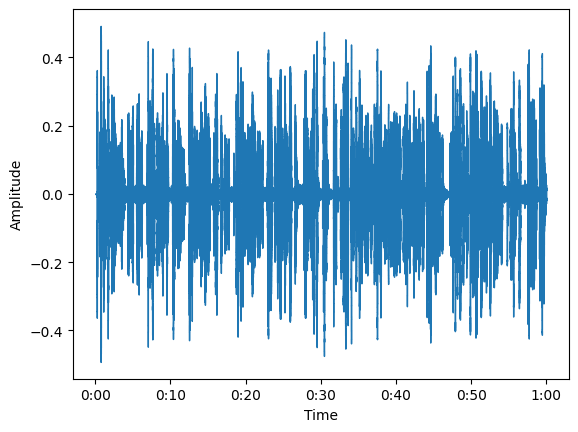

In [22]:
#waveform
signal, sr = librosa.load(file, sr=22050) #sr * T-> 22050 * 30
librosa.display.waveshow(signal, sr=sr)
#librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
#plt.title("Waveform")
plt.show()


Going from the time domain to the frequency domain. This is where the numpy is coing into use. Array as big as the total number of samples being used.

Then from there we see the frequency spectrum and how it can be plotted. (Notice how it is rather symmetrical)

We don't need all of the plot so we can just focus on the first half

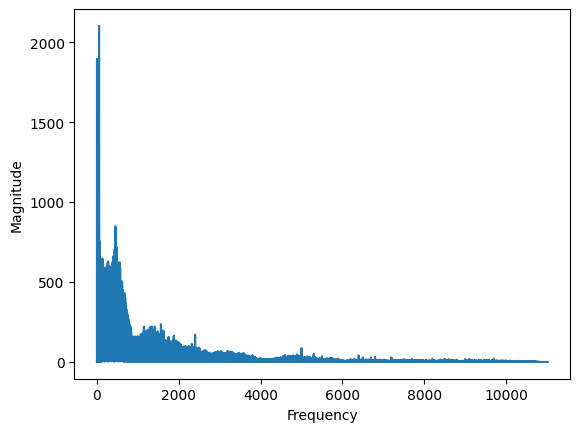

In [23]:
#ffft -> spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))  #sr * T

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude) #giving us the first half of the sprectrum
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


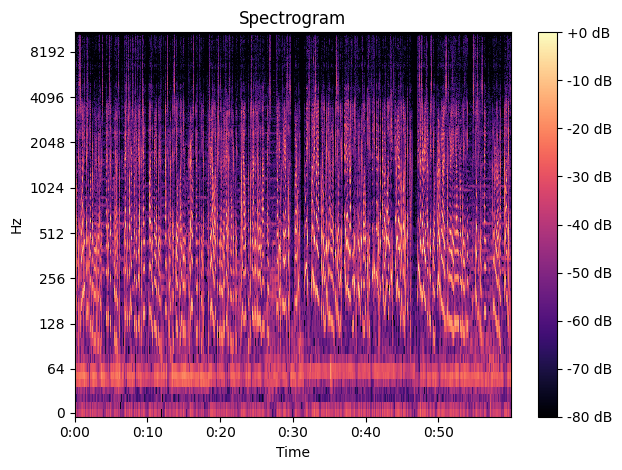

In [24]:
#stft ->spectrogram

n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length= hop_length, n_fft= n_fft)
spectrogram = np.abs(stft)

librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()


How to find the Mel frequency cepstral coefficients (MFCC) to be able to preprocess the audio that is given through this manner

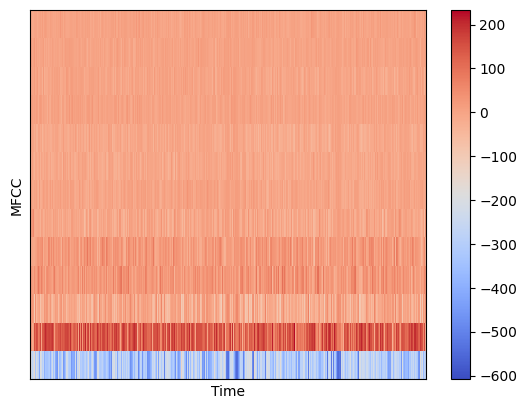

In [27]:
#MFCC

MFCCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()